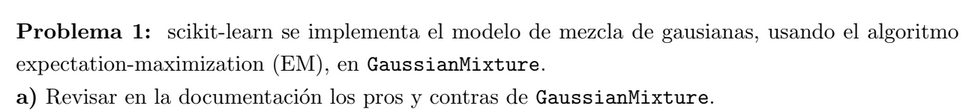

El modelo GaussianMixture de scikit-learn implementa el algoritmo de mezclas de gaussianas con estimación de máxima verosimilitud mediante EM (Expectation-Maximization).

Pros:
 - Modela clusters con formas elípticas
 - Podés elegir el tipo de covarianza

Cons:
 - Si empezás con malos parámetros, puede quedarse atrapado en soluciones subóptima.
 - hay que elegir el número de clusters
 - Asume distribución gaussiana

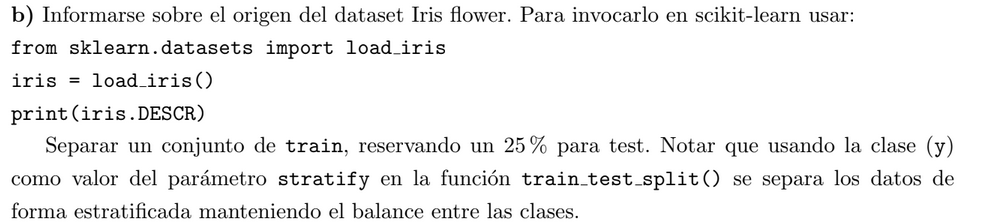

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split

iris = load_iris()

x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

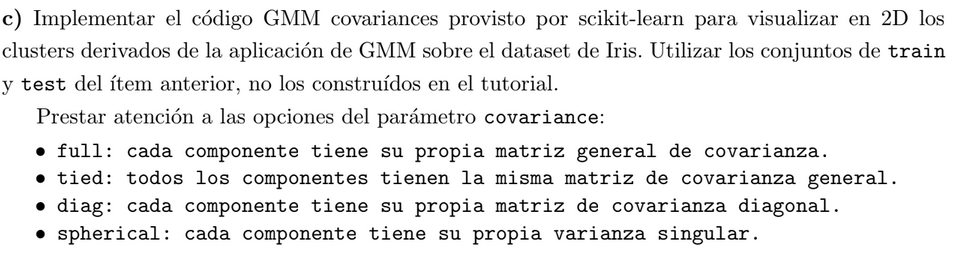

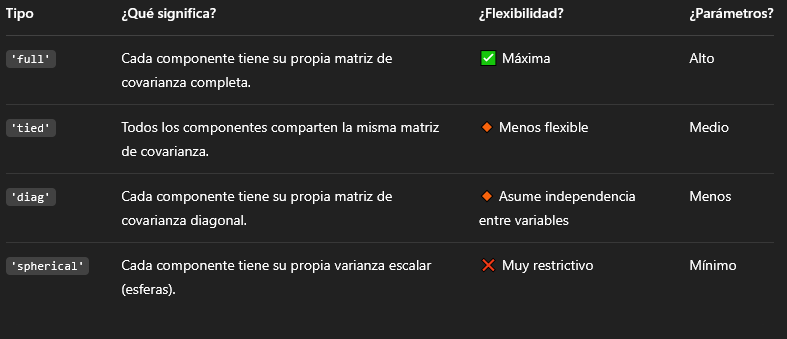

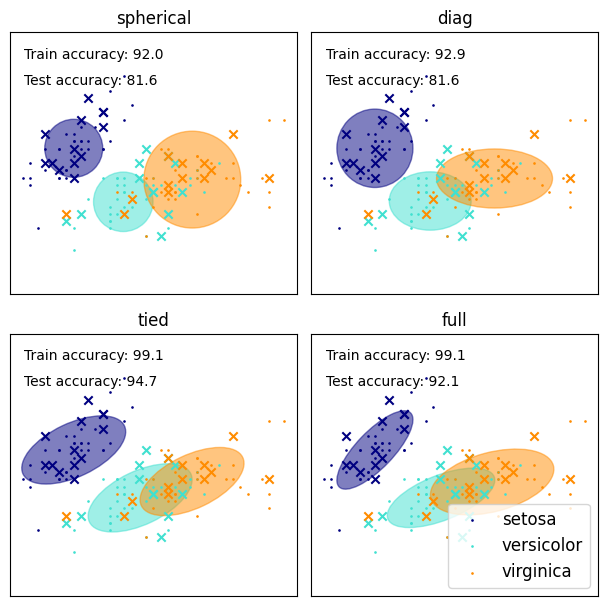

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

colors = ["navy", "turquoise", "darkorange"]


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], angle=180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array(
        [x_train[y_train == i].mean(axis=0) for i in range(n_classes)]
    )

    # Train the other parameters using the EM algorithm.
    estimator.fit(x_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(
            data[:, 0], data[:, 1], s=0.8, color=color, label=iris.target_names[n]
        )
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = x_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

    y_train_pred = estimator.predict(x_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(x_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))


plt.show()

Las visualizaciones son de las 2 primeras caracteristicas, ademas los puntos son del conjunto de entrenamiento y las cruces del conjunto de evaluacion.
Porque spherical tuvo 100% accuracy en test? Será el punto se clasifica segun cercania a cada esfera? El full tuvo buenos resultados.

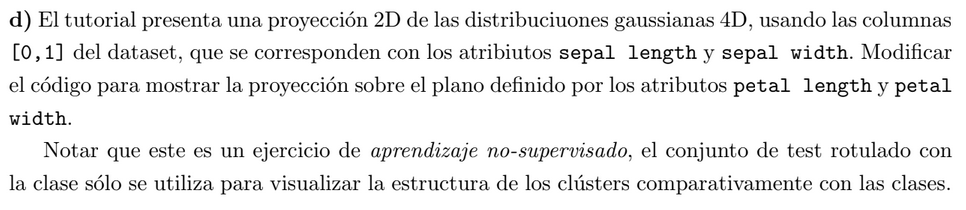

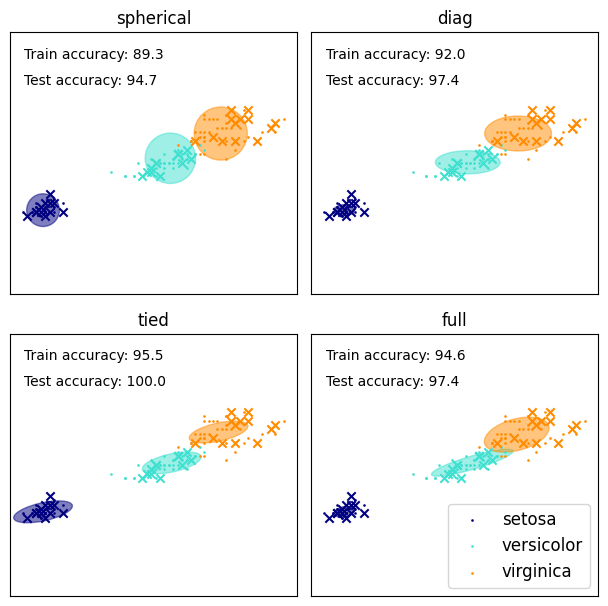

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold


# Swap columna 0 con 2, y 1 con 3
x[:, [0, 2]] = x[:, [2, 0]]
x[:, [1, 3]] = x[:, [3, 1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)


colors = ["navy", "turquoise", "darkorange"]


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], angle=180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array(
        [x_train[y_train == i].mean(axis=0) for i in range(n_classes)]
    )

    # Train the other parameters using the EM algorithm.
    estimator.fit(x_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(
            data[:, 0], data[:, 1], s=0.8, color=color, label=iris.target_names[n]
        )
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = x_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

    y_train_pred = estimator.predict(x_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(x_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))


plt.show()

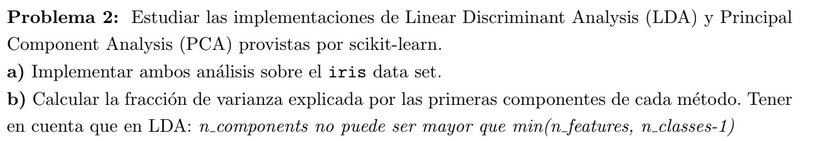

explained variance ratio (first two components): [0.92461872 0.05306648]
Fracción de varianza explicada (LDA): [0.9912126 0.0087874]


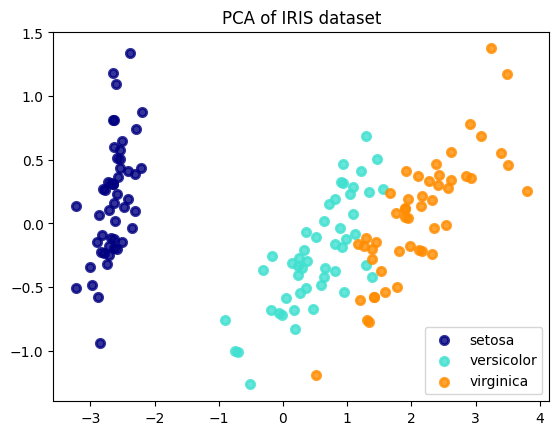

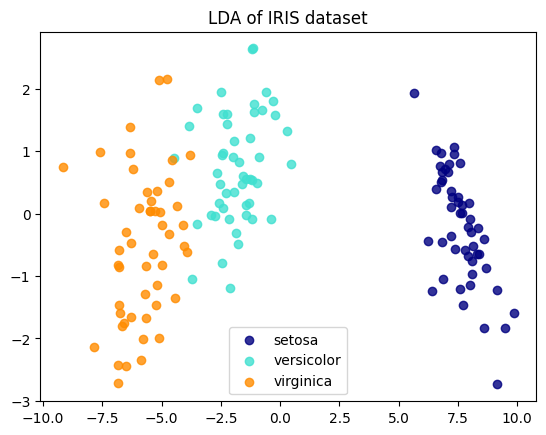

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

# Fracción de varianza explicada por cada componente de lda
explained_var_lda = lda.explained_variance_ratio_
print(f"Fracción de varianza explicada (LDA): {explained_var_lda}")

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

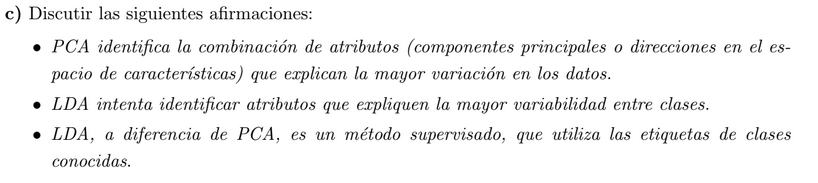

  - Es verdad, se busca proyectar ciertas caracteristicas de tal forma que su variacion sea lo mas que se pueda.  
  - LDA identifica combinaciones de atributos (no atributos individuales) que maximizan la variabilidad entre clases y minimizan la variabilidad dentro de las clases.
  - Si, PCA es un metodo no supervisado.

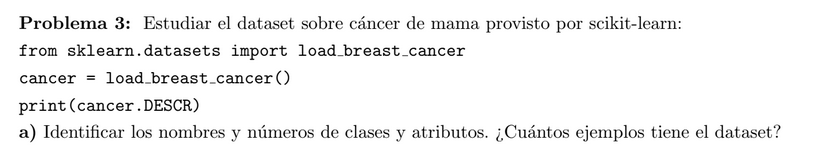

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

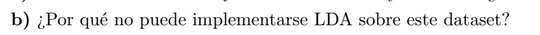

PREGUNTAR

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

x = cancer.data
y = cancer.target

pca = PCA()
x_pca = pca.fit_transform(x)

explained_variance = pca.explained_variance_ratio_

print(explained_variance[:10])

#Suma cumulativa de las varianzas
print(np.cumsum(explained_variance))


[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07]
[0.98204467 0.99822116 0.99977867 0.9998996  0.99998788 0.99999453
 0.99999854 0.99999936 0.99999971 0.99999989 0.99999996 0.99999998
 0.99999999 0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


Podria quedarme con la primera o las 2 primeras, ya que me garantizan la mayor parte de la varianza total.

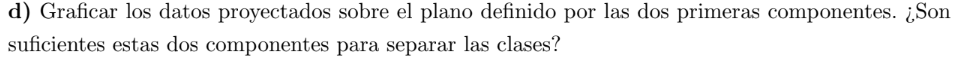

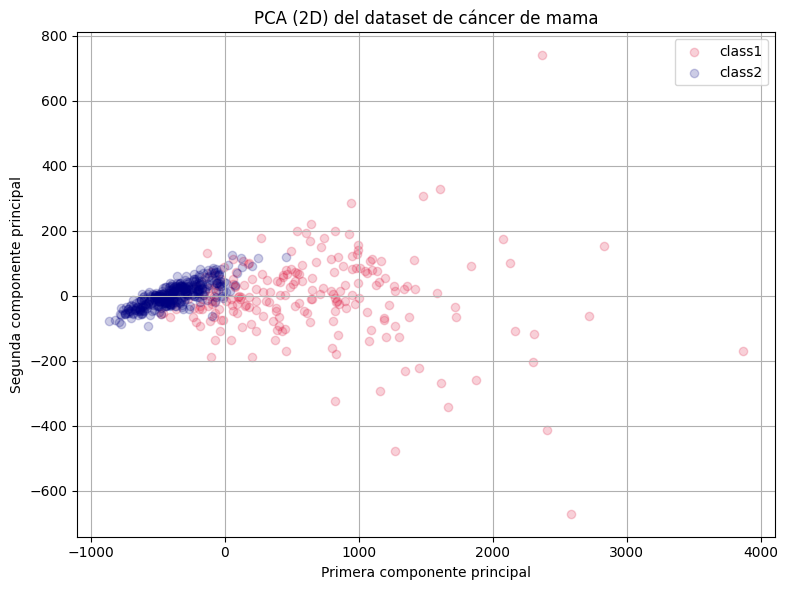

In [ ]:

plt.figure(figsize=(8, 6))
colors = ['crimson', 'navy']
target_names = ['class1', 'class2']
for i, label in enumerate(np.unique(y)):
    plt.scatter(
        x_pca[y == label, 0],
        x_pca[y == label, 1],
        alpha=0.2,
        label=target_names[label],
        color=colors[i]
    )

plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente principal')
plt.title('PCA (2D) del dataset de cáncer de mama')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Nose si son suficientes para separar las dos clases, noto que hay cierto solapamiento, capaz algo se pueda hacer...PREGUNTAR

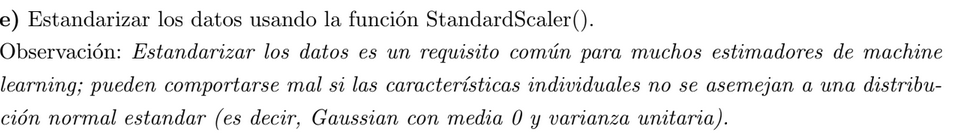

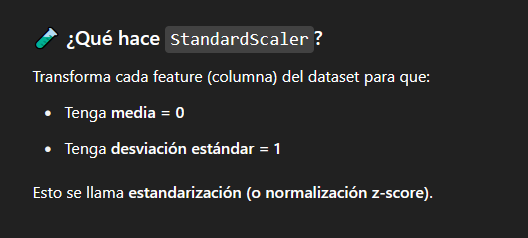

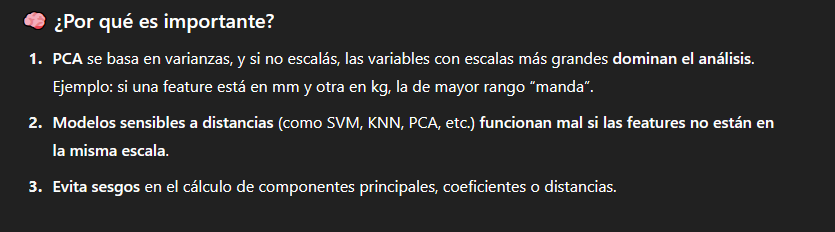

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


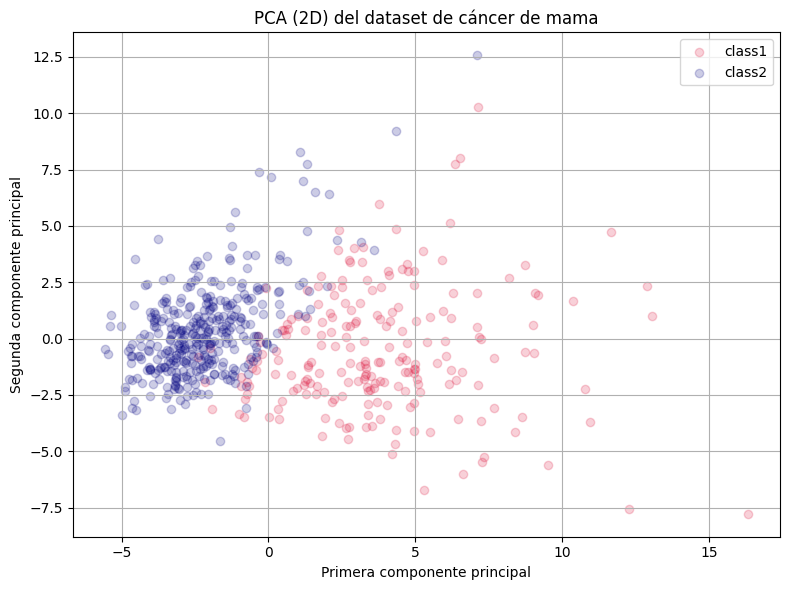

In [ ]:
from sklearn.preprocessing import StandardScaler

# Estandarizar
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


pca = PCA()
x_pca = pca.fit_transform(x_scaled)

explained_variance = pca.explained_variance_ratio_

print(explained_variance[:10])

#Suma cumulativa de las varianzas
print(np.cumsum(explained_variance))


plt.figure(figsize=(8, 6))
colors = ['crimson', 'navy']
target_names = ['class1', 'class2']
for i, label in enumerate(np.unique(y)):
    plt.scatter(
        x_pca[y == label, 0],
        x_pca[y == label, 1],
        alpha=0.2,
        label=target_names[label],
        color=colors[i]
    )

plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente principal')
plt.title('PCA (2D) del dataset de cáncer de mama')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

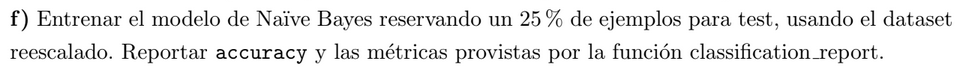

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, stratify=y)

model = GaussianNB()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred)}")
print(f"precision: {precision_score(y_test, y_pred)}")
confusion_matrix(y_test, y_pred)


accuracy: 0.951048951048951
recall: 0.9666666666666667
precision: 0.9560439560439561


array([[49,  4],
       [ 3, 87]])

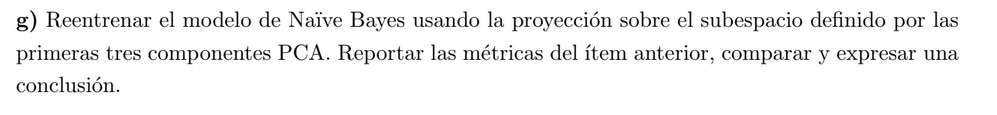

In [ ]:
pca = PCA(n_components=3)

x_pca = pca.fit_transform(x_scaled)

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.25, stratify=y)

model = GaussianNB()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred)}")
print(f"precision: {precision_score(y_test, y_pred)}")
confusion_matrix(y_test, y_pred)

accuracy: 0.916083916083916
recall: 0.9555555555555556
precision: 0.9148936170212766


array([[45,  8],
       [ 4, 86]])

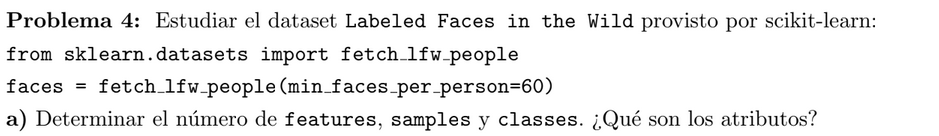

In [ ]:
from sklearn.datasets import fetch_lfw_people

dataset = fetch_lfw_people(min_faces_per_person=60)

print(dataset.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenCV li

Classes         (distintas personas)                       5749

Samples total   (ejemplos, supongo hay personas repetidas)                      13233

Dimensionality (Cada imagen está representada como un vector de 5828 números.)                        5828

Features      (Cada pixel en la imagen es un número real entre 0 y 255.)      real, between 0 and 255

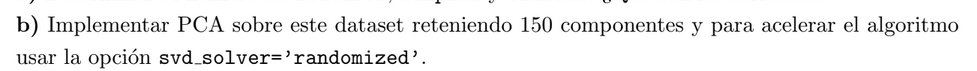

In [ ]:
x = dataset.data
y = dataset.target

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


pca = PCA(n_components=150, svd_solver='randomized')
x_pca = pca.fit_transform(x_scaled)

print(f"Los eigen-faces: {x_pca[:10]}")

explained_variance = pca.explained_variance_ratio_

print(f"Las varianzas: {explained_variance}")



Los eigen-faces: [[-2.77691269e+01 -1.38903685e+01 -1.59258997e+00 ... -1.09768379e+00
   6.58597231e-01 -2.57695138e-01]
 [-1.76895924e+01  6.59035206e+00 -9.58466244e+00 ... -2.70845573e-02
   2.55297399e+00  5.21101296e-01]
 [-1.34599233e+00  5.45527697e+00 -1.42507668e+01 ...  7.08929420e-01
   1.09970617e+00  1.29886404e-01]
 ...
 [ 3.17502289e+01  3.33223763e+01  2.15967388e+01 ... -2.63238668e+00
  -2.49534562e-01 -2.03163552e+00]
 [ 2.64102020e+01  5.12626219e+00  2.79110584e+01 ... -1.96604931e+00
   4.49794054e-01  4.68507618e-01]
 [ 4.47385292e+01  9.80616283e+00  3.21044898e+00 ...  1.01247065e-01
   3.78916407e+00  1.44455469e+00]]
Las varianzas: [0.25922608 0.14126034 0.06924301 0.04924036 0.03129805 0.02535328
 0.01942727 0.01662604 0.01522179 0.01483339 0.01258603 0.01205579
 0.01159839 0.00995888 0.00920135 0.00896645 0.00833817 0.00735047
 0.00643945 0.00614405 0.00595354 0.00539639 0.00512847 0.00500223
 0.00483668 0.00464869 0.00430879 0.004063   0.00403585 0.003669

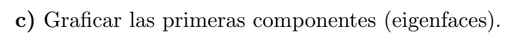

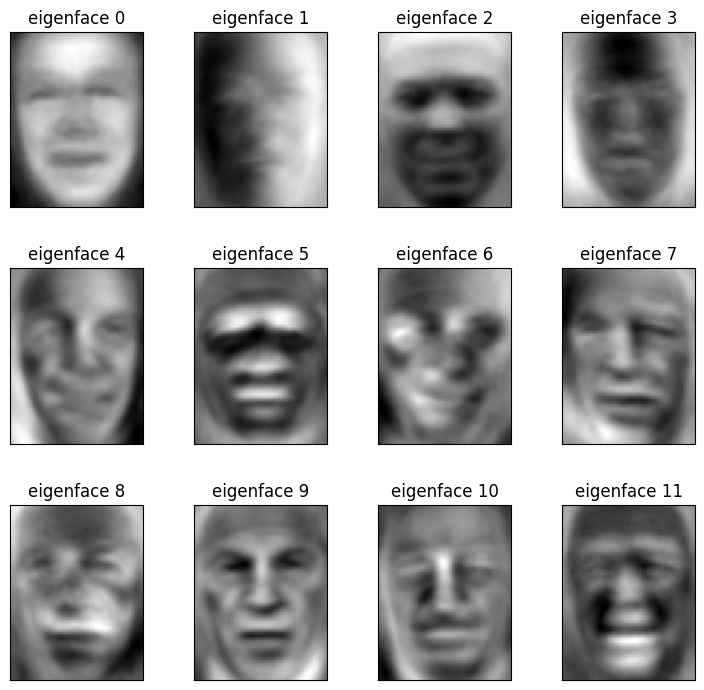

In [ ]:
n_samples, h, w = dataset.images.shape

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


eigenface_titles = ["eigenface %d" % i for i in range(x_pca.shape[0])]
plot_gallery(pca.components_ , eigenface_titles, h, w)

plt.show()


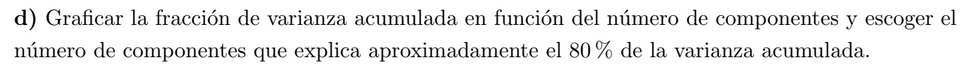

In [ ]:
var_acumulada = 0
cant_componentes = 0
for i in range(len(explained_variance)):
  var_acumulada += explained_variance[i]
  if var_acumulada >= 0.8:
    cant_componentes = i+1
    break
print(f"varianza acumulada: {var_acumulada}")
print(f"cantidad de componentes: {cant_componentes}")

varianza acumulada: 0.8013538122177124
cantidad de componentes: 36


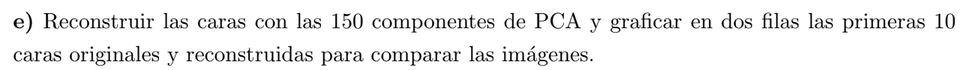

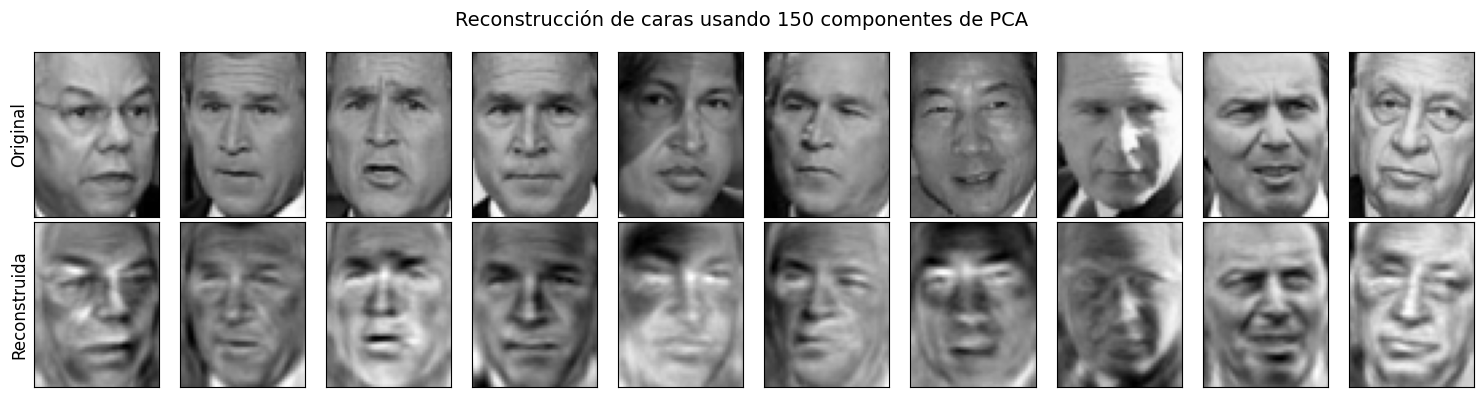

In [ ]:
# 3. Reconstrucción (inversa del PCA)
x_reconstruido = pca.inverse_transform(x_pca)

# 4. Mostrar primeras 10 imágenes: original vs reconstruida
n_imagenes = 10
fig, axes = plt.subplots(2, n_imagenes, figsize=(15, 4),
                         subplot_kw={'xticks': [], 'yticks': []})

for i in range(n_imagenes):
    # Fila 1: originales
    axes[0, i].imshow(x[i].reshape((h, w)), cmap='gray')
    if i == 0:
        axes[0, i].set_ylabel("Original", fontsize=12)

    # Fila 2: reconstruidas
    axes[1, i].imshow(x_reconstruido[i].reshape((h, w)), cmap='gray')
    if i == 0:
        axes[1, i].set_ylabel("Reconstruida", fontsize=12)

plt.suptitle("Reconstrucción de caras usando 150 componentes de PCA", fontsize=14)
plt.tight_layout()
plt.show()

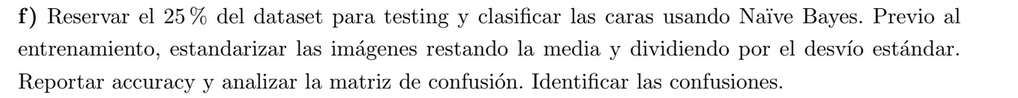

In [ ]:
from sklearn.metrics import classification_report

x = dataset.data
y = dataset.target

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=150, svd_solver='randomized')
x_pca = pca.fit_transform(x_scaled)

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.25, stratify=y)

model = GaussianNB()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f"accuracy: {accuracy_score(y_test, y_pred)}")
confusion_matrix(y_test, y_pred)


accuracy: 0.6824925816023739


array([[  9,   4,   0,   5,   0,   0,   1,   0],
       [  5,  42,   0,   5,   0,   1,   3,   3],
       [  4,   2,  17,   4,   0,   0,   0,   3],
       [  6,   4,   1, 118,   2,   0,   1,   1],
       [  0,   2,   0,  12,  12,   1,   0,   0],
       [  0,   1,   0,   7,   3,   7,   0,   0],
       [  1,   1,   0,   2,   1,   0,  10,   0],
       [  1,   4,   0,  16,   0,   0,   0,  15]])

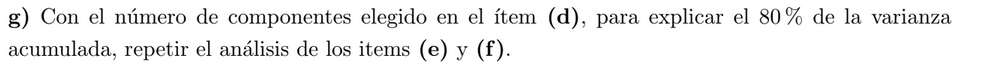

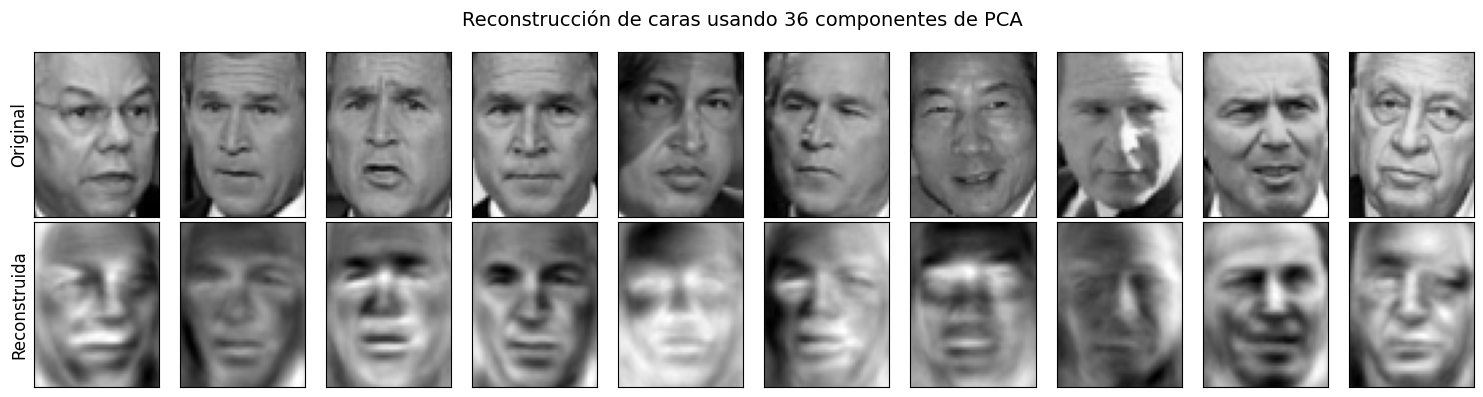

In [ ]:
x = dataset.data
y = dataset.target

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


pca = PCA(n_components=36, svd_solver='randomized')
x_pca = pca.fit_transform(x_scaled)


# 3. Reconstrucción (inversa del PCA)
x_reconstruido = pca.inverse_transform(x_pca)

# 4. Mostrar primeras 10 imágenes: original vs reconstruida
n_imagenes = 10
fig, axes = plt.subplots(2, n_imagenes, figsize=(15, 4),
                         subplot_kw={'xticks': [], 'yticks': []})

for i in range(n_imagenes):
    # Fila 1: originales
    axes[0, i].imshow(x[i].reshape((h, w)), cmap='gray')
    if i == 0:
        axes[0, i].set_ylabel("Original", fontsize=12)

    # Fila 2: reconstruidas
    axes[1, i].imshow(x_reconstruido[i].reshape((h, w)), cmap='gray')
    if i == 0:
        axes[1, i].set_ylabel("Reconstruida", fontsize=12)

plt.suptitle("Reconstrucción de caras usando 36 componentes de PCA", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:

x = dataset.data
y = dataset.target

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=36, svd_solver='randomized')
x_pca = pca.fit_transform(x_scaled)

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.25, stratify=y)

model = GaussianNB()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f"accuracy: {accuracy_score(y_test, y_pred)}")
confusion_matrix(y_test, y_pred)

accuracy: 0.7418397626112759


array([[ 10,   2,   1,   6,   0,   0,   0,   0],
       [  3,  48,   1,   5,   1,   1,   0,   0],
       [  3,   1,  16,   8,   0,   0,   0,   2],
       [  5,   1,   2, 120,   3,   0,   0,   2],
       [  0,   1,   2,   3,  16,   2,   0,   3],
       [  0,   0,   0,   7,   2,   8,   0,   1],
       [  0,   1,   0,   1,   1,   2,  10,   0],
       [  1,   4,   0,   9,   0,   0,   0,  22]])

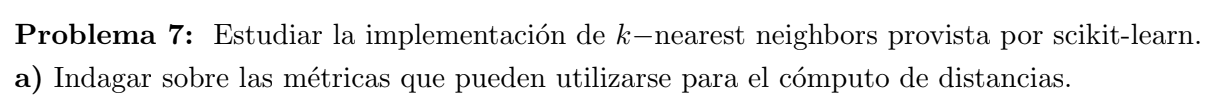

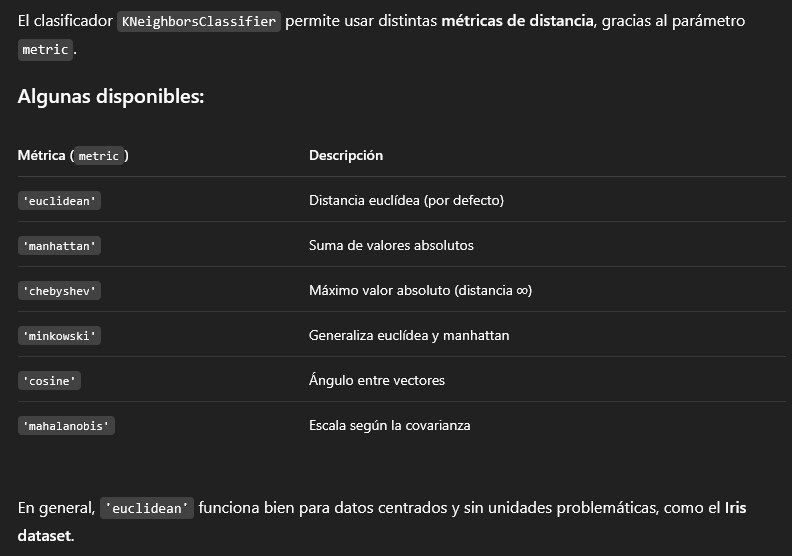

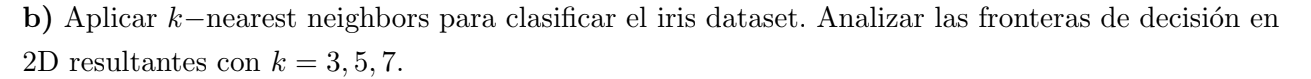

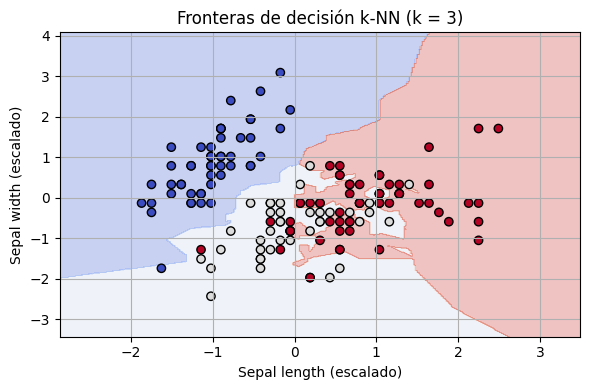

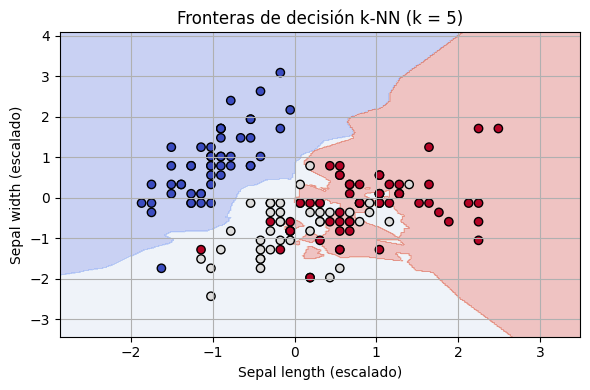

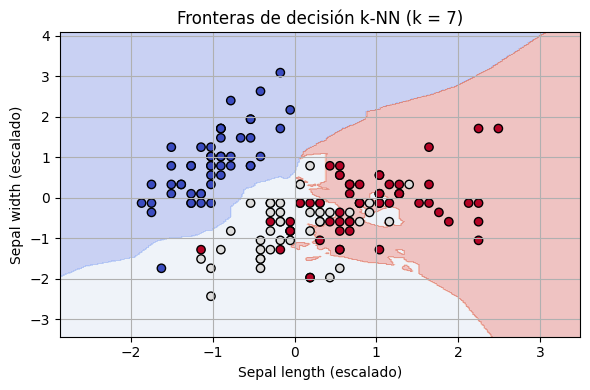

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler

# Cargar datos y seleccionar dos features para visualizar en 2D
iris = datasets.load_iris()
X = iris.data[:, :2]  # sepal length y sepal width
y = iris.target

# Escalar (opcional pero recomendable)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Crear malla para graficar fronteras
h = .02  # resolución
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Probar con diferentes valores de k
for k in [3, 5, 7]:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Predecir sobre la malla
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(f"Fronteras de decisión k-NN (k = {k})")
    plt.xlabel("Sepal length (escalado)")
    plt.ylabel("Sepal width (escalado)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

# Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# k-NN con k=5 (por ejemplo)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Reportes

print(f"accuracy Naïve Bayes: {accuracy_score(y_test, y_pred_nb)}")
print(f"accuracy k-NN (k=5): {accuracy_score(y_test, y_pred_knn)}")

# Matrices de confusión
print("Matriz de confusión NB:")
print(confusion_matrix(y_test, y_pred_nb))

print("Matriz de confusión k-NN:")
print(confusion_matrix(y_test, y_pred_knn))


accuracy Naïve Bayes: 0.8
accuracy k-NN (k=5): 0.7666666666666667
Matriz de confusión NB:
[[10  0  0]
 [ 0  7  3]
 [ 0  3  7]]
Matriz de confusión k-NN:
[[10  0  0]
 [ 0  6  4]
 [ 0  3  7]]


k-NN suele ser más flexible, pero puede sobreajustar si kk es muy chico.

Naïve Bayes es más suave, puede fallar si las features no siguen distribuciones normales o si hay mucha correlación entre features.

Las matrices de confusión te permiten ver qué clases se confunden más, como por ejemplo Setosa vs Versicolor.

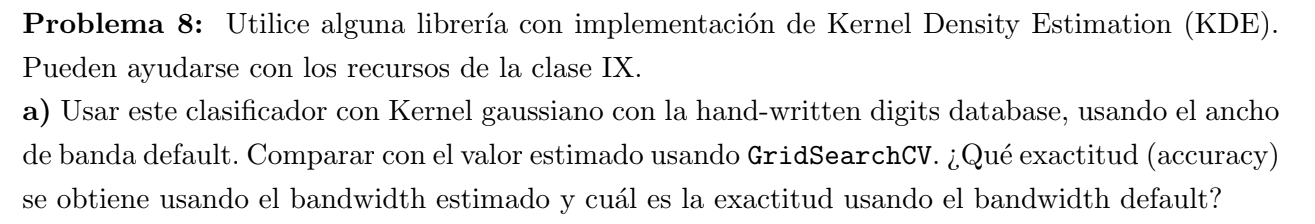

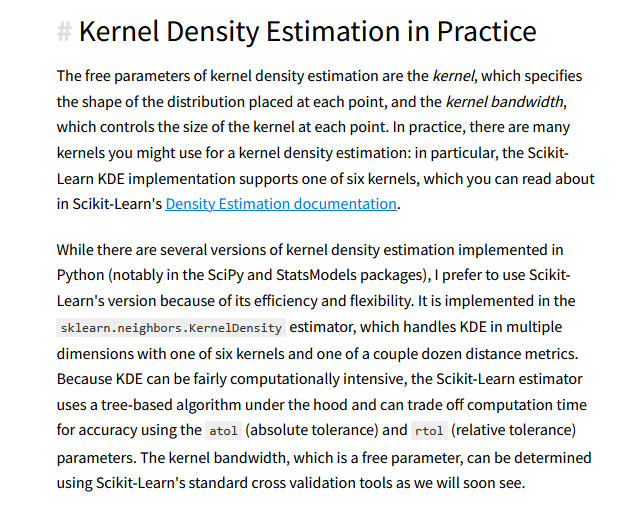

In [ ]:
from sklearn import datasets
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import GridSearchCV

# Cargar dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Estandarizar
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

def train_kde_classifiers(X_train, y_train, kernel='gaussian', bandwidth=1.0): #1.0 es el default bandwidth
    kde_models = {}
    priors = {}
    classes = np.unique(y_train)

    # Contar elementos por clase
    class_counts = Counter(y_train)
    total = len(y_train)

    for cls in classes:
        X_cls = X_train[y_train == cls]
        kde = KernelDensity(kernel=kernel, bandwidth=bandwidth)
        kde.fit(X_cls)
        kde_models[cls] = kde
        priors[cls] = class_counts[cls] / total  # prior estimado

    return kde_models, priors

def predict_kde_with_priors(X_test, kde_models, priors):
    log_probs = [] #Arreglo de las predicciones con kernel density para cada clase en orden
    for cls in sorted(kde_models):
        log_likelihood = kde_models[cls].score_samples(X_test)
        log_prior = np.log(priors[cls])
        log_probs.append(log_likelihood + log_prior)
    log_probs = np.array(log_probs).T
    return np.argmax(log_probs, axis=1) #devuelve el indice de la posicion mas grande, es decir la clase mas probable

kde_models_default, priors_default = train_kde_classifiers(X_train, y_train)
y_pred_default = predict_kde_with_priors(X_test, kde_models_default, priors_default)
acc_default = accuracy_score(y_test, y_pred_default)

print(f"Accuracy con bandwidth default: {acc_default:.4f}")


params = {'bandwidth': np.logspace(-3, 3, 30)}
grid = GridSearchCV(KernelDensity(kernel='gaussian'), params, cv=3)
grid.fit(X_train)  # no necesita etiquetas para KDE

best_bw = grid.best_params_['bandwidth']
print(f"Mejor bandwidth encontrado: {best_bw:.4f}")

# Entrenar de nuevo con el mejor bandwidth
kde_models_opt, priors_opt = train_kde_classifiers(X_train, y_train, bandwidth=best_bw)
y_pred_opt = predict_kde_with_priors(X_test, kde_models_opt, priors_opt)
acc_opt = accuracy_score(y_test, y_pred_opt)
print(f"Accuracy con bandwidth óptimo: {acc_opt:.4f}")


Accuracy con bandwidth default: 0.9733
Mejor bandwidth encontrado: 0.4894
Accuracy con bandwidth óptimo: 0.7778


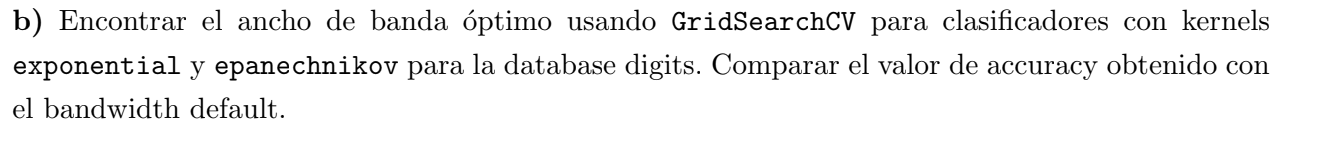

In [ ]:
for kernel in ['exponential', 'epanechnikov']:

    # GridSearch para cada kernel
    grid = GridSearchCV(KernelDensity(kernel=kernel), params, cv=3)
    grid.fit(X_train)

    best_bw = grid.best_params_['bandwidth']
    print(f"Mejor bandwidth para {kernel}: {best_bw:.4f}")

    # Entrenar y evaluar
    kde_models, priors_opt2 = train_kde_classifiers(X_train, y_train, bandwidth=best_bw, kernel=kernel)
    y_pred = predict_kde_with_priors(X_test, kde_models, priors_opt2)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy con kernel {kernel}: {acc:.4f}")

Mejor bandwidth para exponential: 0.0452
Accuracy con kernel exponential: 0.3444


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [            -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf             -inf             -inf
             -inf             -inf  -80975.56831268  -94637.13976999
 -108316.76463525 -122002.6874369  -135690.96787672 -149380.14773953
 -163069.67305101 -176759.33137906]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1119: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


Mejor bandwidth para epanechnikov: 35.6225
Accuracy con kernel epanechnikov: 0.5822


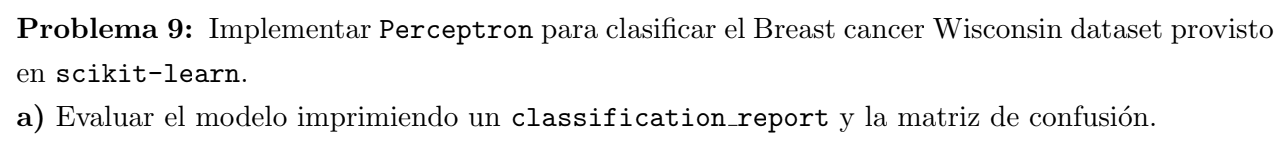

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar datos
data = load_breast_cancer()
X = data.data
y = data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

# Estandarizar (importante para Perceptrón)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inicializar y entrenar Perceptrón
perceptron = Perceptron(max_iter=1000, tol=1e-3)
perceptron.fit(X_train, y_train)

# Predicción
y_pred_perceptron = perceptron.predict(X_test)

# Evaluación
print("=== Perceptrón ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_perceptron):.4f}")
print("\nClassification report:")
print(classification_report(y_test, y_pred_perceptron))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_perceptron))


=== Perceptrón ===
Accuracy: 0.9930

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.99      1.00      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Matriz de confusión:
[[52  1]
 [ 0 90]]


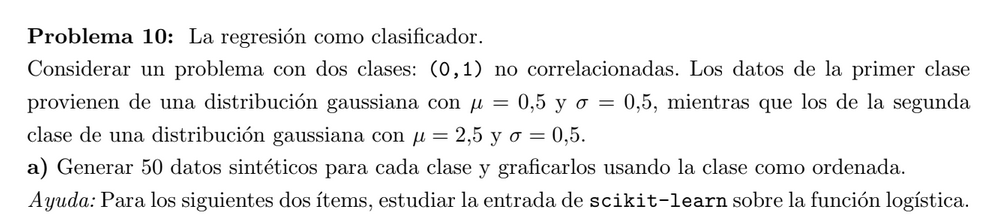

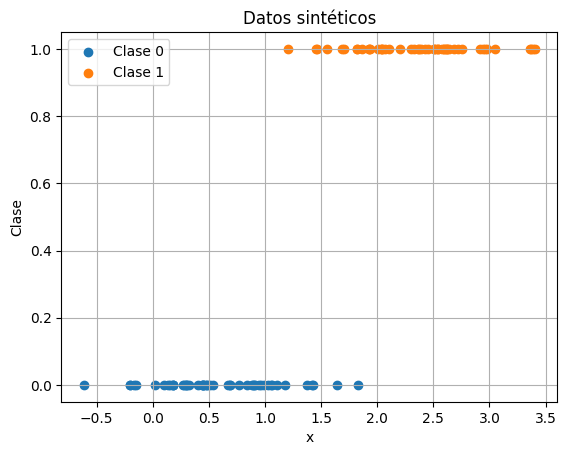

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class0 = np.random.normal(0.5, 0.5, 50)
class1 = np.random.normal(2.5, 0.5, 50)

X = np.concatenate([class0, class1])
y = np.array([0]*50 + [1]*50)

# Graficar puntos
plt.scatter(class0, [0]*50, label="Clase 0")
plt.scatter(class1, [1]*50, label="Clase 1")
plt.xlabel("x")
plt.ylabel("Clase")
plt.title("Datos sintéticos")
plt.legend()
plt.grid(True)
plt.show()


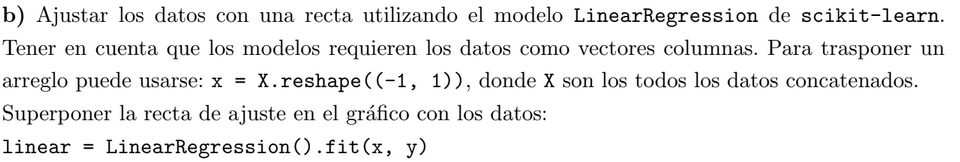

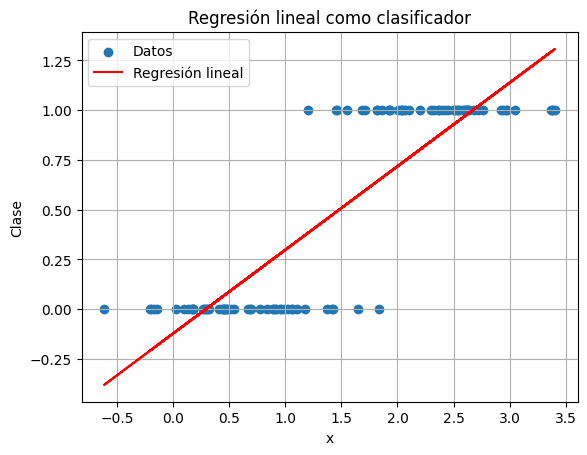

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from scipy.special import expit  # Función sigmoide

x_col = X.reshape(-1, 1)
lin_reg = LinearRegression().fit(x_col, y)
y_lin = lin_reg.coef_ * X + lin_reg.intercept_

# Graficar con recta de ajuste
plt.scatter(X, y, label="Datos")
plt.plot(X, y_lin, color='red', label="Regresión lineal")
plt.xlabel("x")
plt.ylabel("Clase")
plt.title("Regresión lineal como clasificador")
plt.legend()
plt.grid(True)
plt.show()


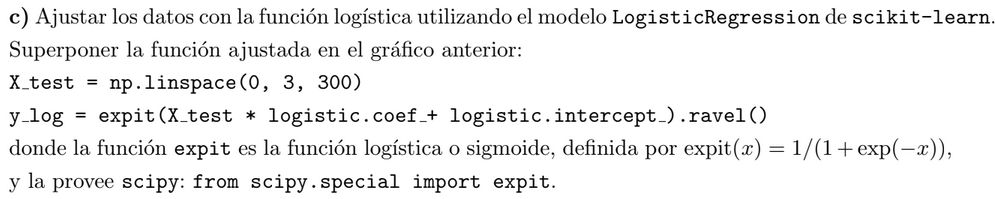

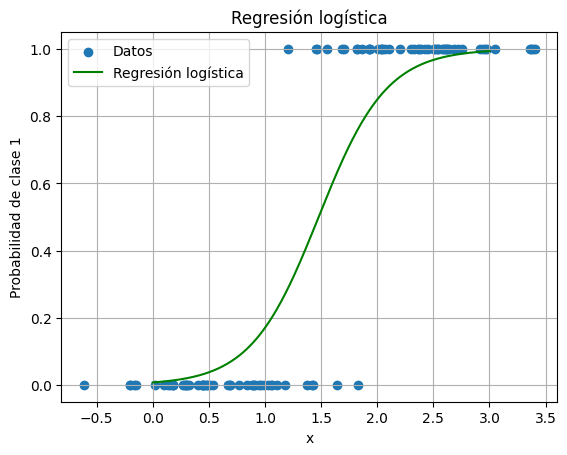

In [ ]:
log_reg = LogisticRegression().fit(x_col, y)
X_test = np.linspace(0, 3, 300)
y_log = expit(X_test * log_reg.coef_[0][0] + log_reg.intercept_[0])

# Graficar con función logística
plt.scatter(X, y, label="Datos")
plt.plot(X_test, y_log, color='green', label="Regresión logística")
plt.xlabel("x")
plt.ylabel("Probabilidad de clase 1")
plt.title("Regresión logística")
plt.legend()
plt.grid(True)
plt.show()

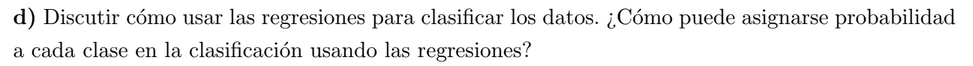

En este caso estamos generando una funcion sigmoide que mejor se adapta a los datos que tenemos. Dicha funcion devuelve para cada x un valor que esta en el rango [0,1], donde 0 y 1  son nuestras clases. La idea es asignar la clase que esta mas cerca del valor devuelto por la funcion.
justamente la probabilidad para un x de ser de la clase 1 es f(x) y 1-f(x) para la clase 0.

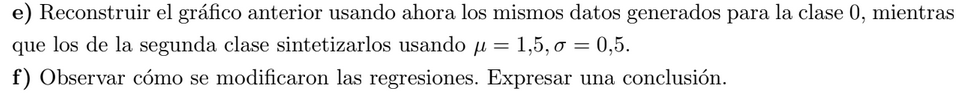

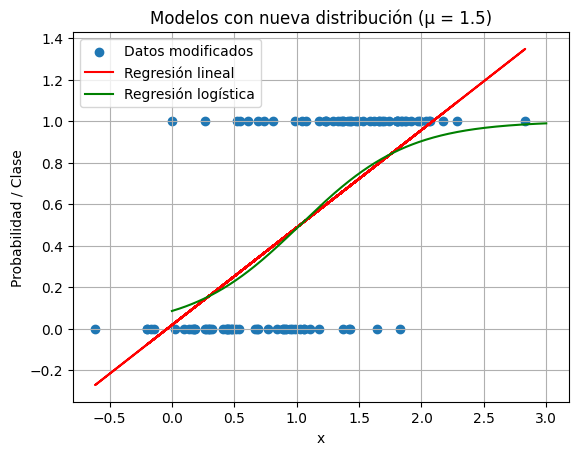

In [ ]:
class1_mod = np.random.normal(1.5, 0.5, 50)
X_mod = np.concatenate([class0, class1_mod])
y_mod = np.array([0]*50 + [1]*50)
x_col_mod = X_mod.reshape(-1, 1)

lin_reg_mod = LinearRegression().fit(x_col_mod, y_mod)
log_reg_mod = LogisticRegression().fit(x_col_mod, y_mod)

y_lin_mod = lin_reg_mod.coef_ * X_mod + lin_reg_mod.intercept_
X_test_mod = np.linspace(0, 3, 300)
y_log_mod = expit(X_test_mod * log_reg_mod.coef_[0][0] + log_reg_mod.intercept_[0])

# Graficar ambos modelos con nuevos datos
plt.scatter(X_mod, y_mod, label="Datos modificados")
plt.plot(X_mod, y_lin_mod, color='red', label="Regresión lineal")
plt.plot(X_test_mod, y_log_mod, color='green', label="Regresión logística")
plt.xlabel("x")
plt.ylabel("Probabilidad / Clase")
plt.title("Modelos con nueva distribución (μ = 1.5)")
plt.legend()
plt.grid(True)
plt.show()
